In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pynoodle import Block, FieldUpdater, LamellarCell, Mesh, Monomer, Polymer, System
from pynoodle.simulation.scft import scft


In [2]:
monomer_a = Monomer(0, 1.0)
monomer_b = Monomer(1, 1.0)

block_a = Block(monomer_a, 50, 1.0)
block_b = Block(monomer_b, 50, 1.0)

polymer = Polymer([block_a, block_b], 100, 1.0)

In [3]:
L = 10.0
M = 128

mesh = Mesh(M)
cell = LamellarCell(L)

system = System(mesh, cell, [polymer])
system.set_interaction(0, 1, 0.25)
system.sample_fields(scale=0.1)

updater = FieldUpdater(system, step_size=0.25)

In [4]:
result = scft(system, updater, steps=100, field_tolerance=1e-5)

SCFT:   0%|          | 0/100 [00:00<?, ?it/s, err=2.79, f=0.053] 

SCFT:  37%|███▋      | 37/100 [00:00<00:00, 873.51it/s, err=7.67e-6, f=0.0405]


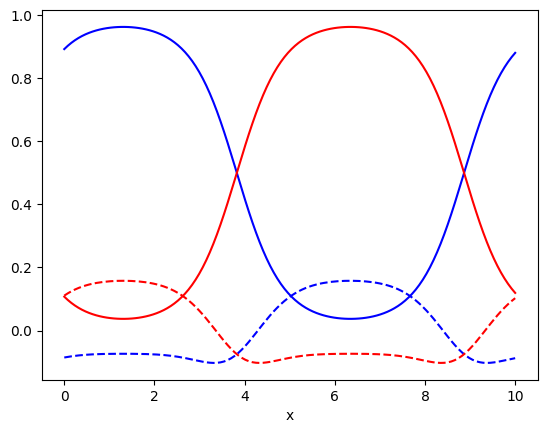

In [7]:
fields = system.fields()
concentrations = system.concentrations()

x = np.linspace(0, L, M)

plt.plot(x, concentrations[0], c="b")
plt.plot(x, fields[0], c="b", ls="--")

plt.plot(x, concentrations[1], c="r")
plt.plot(x, fields[1], c="r", ls="--")

plt.xlabel("x")
plt.show()